In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset = pd.read_csv("u.data.csv",sep='|',names="user_id,item_id,rating,timestamp".split(","))
dataset=dataset.drop('timestamp',axis=1)
dataset = dataset.iloc[1:,:]

datauser = pd.read_csv("u.user.csv",sep='|')
datauser = datauser.rename(columns={'id ': 'user_id',' age ':'age',' gender ':'gender',' job ':'job'})

df_item = pd.read_csv('u.item.csv', sep='|')
df_item  = df_item.drop([' video release date ',' movie title ', ' release date ',' IMDb URL '], axis=1)
df_item = df_item.rename(columns={'movie id ': 'item_id'})


In [3]:
dataset.dtypes

user_id    object
item_id    object
rating     object
dtype: object

In [4]:
dataset.iloc[334,:]

user_id      1
item_id    160
rating       4
Name: 335, dtype: object

In [5]:
m = np.zeros((943,1682))
for i in range(len(dataset)):
    m[int(dataset.iloc[i,0])-1,int(dataset.iloc[i,1])-1]=int(dataset.iloc[i,2])

In [6]:
dataset.item_id = dataset.item_id.astype('int16')
dataset.user_id = dataset.user_id.astype('int16')
dataset.item_id = dataset.item_id.astype('category')
dataset.user_id = dataset.user_id.astype('category')

In [7]:
datauser.user_id = datauser.user_id.astype('int16')
datauser.user_id = datauser.user_id.astype('category')
df_item.item_id = df_item.item_id.astype('int16')
df_item.item_id = df_item.item_id.astype('category')

In [8]:
dataset.head()

,user_id,item_id,rating
1,196,242,3
2,186,302,3
3,22,377,1
4,244,51,2
5,166,346,1


In [58]:
dataset = dataset.sort_values('item_id')

In [9]:
dataset.isnull().any()

user_id    False
item_id    False
rating     False
dtype: bool

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [145]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras import regularizers

n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 9

In [146]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies+1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users+1, n_latent_factors,name='User-Embedding')(user_input))


result = keras.layers.merge([movie_vec, user_vec], mode='dot',name='dot')


model = keras.Model([user_input, movie_input], result)

model.compile(optimizer='adam',loss= 'mean_squared_error')

In [147]:
import graphviz

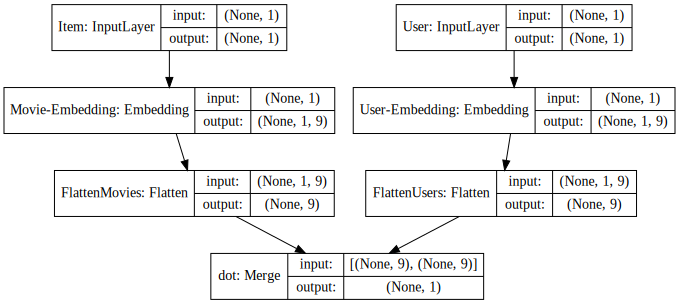

In [148]:
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [149]:
model.fit([dataset.user_id, dataset.item_id], dataset.rating, epochs=25,batch_size=32)

Epoch 1/25
100000/100000 [==============================] - 14s 139us/step - loss: 8.9654
Epoch 2/25
100000/100000 [==============================] - 18s 178us/step - loss: 1.5992
Epoch 3/25
100000/100000 [==============================] - 14s 140us/step - loss: 1.0357
Epoch 4/25
100000/100000 [==============================] - ETA: 0s - loss: 0.936 - 12s 122us/step - loss: 0.9353
Epoch 5/25
100000/100000 [==============================] - 13s 131us/step - loss: 0.9043
Epoch 6/25
100000/100000 [==============================] - 13s 132us/step - loss: 0.8896
Epoch 7/25
100000/100000 [==============================] - 12s 115us/step - loss: 0.8788
Epoch 8/25
100000/100000 [==============================] - 13s 126us/step - loss: 0.8693
Epoch 9/25
100000/100000 [==============================] - 11s 113us/step - loss: 0.8583
Epoch 10/25
100000/100000 [==============================] - 12s 118us/step - loss: 0.8457
Epoch 11/25
100000/100000 [==============================] - 11s 113us/step

In [150]:
model.predict([dataset.item_id[0:1],dataset.item_id[0:1]])

array([[3.8924057]], dtype=float32)

In [151]:
df_item.head()

,item_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [152]:
datauser = pd.read_csv("u.user.csv",sep='|')
datauser = datauser.rename(columns={'id ': 'user_id',' age ':'age',' gender ':'gender',' job ':'job'})

In [153]:
datauser.job = datauser.job.astype('category').cat.codes.values
datauser.gender = datauser.gender.astype('category').cat.codes.values
datauser.head()

,user_id,age,gender,job,zip
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [154]:
dataset.user_id = dataset.user_id.astype('category')
dataset.item_id = dataset.item_id.astype('category')
df_item = pd.read_csv('u.item.csv', sep='|')
df_item  = df_item.drop([' video release date ',' movie title ', ' release date ',' IMDb URL '], axis=1)
df_item = df_item.rename(columns={'movie id ': 'item_id'})
df_item.item_id = df_item.item_id.astype('category')
df_item.head()

,item_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [155]:
np.sum(df_item.iloc[:,1:])

 unknown           2
 Action          251
 Adventure       135
 Animation        42
 Children's      122
 Comedy          505
 Crime           109
 Documentary      50
 Drama           725
 Fantasy          22
 Film-Noir        24
 Horror           92
 Musical          56
 Mystery          61
 Romance         247
 Sci-Fi          101
 Thriller        251
 War              71
 Western          27
dtype: int64

In [156]:
model.layers[2].get_config()

{'name': 'Movie-Embedding',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'float32',
 'input_dim': 1683,
 'output_dim': 9,
 'embeddings_initializer': {'class_name': 'RandomUniform',
  'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
 'embeddings_regularizer': None,
 'activity_regularizer': None,
 'embeddings_constraint': None,
 'mask_zero': False,
 'input_length': None}

In [157]:
def extract_weights(name, model):
    """Extract weights from a neural network model"""
    
    # Extract weights
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    return weights

In [158]:
user_weights_class = extract_weights('User-Embedding', model)[1:,:]

In [159]:
movie_weights_class = extract_weights('Movie-Embedding', model)[1:,:]
np.dot(user_weights_class[0,:],movie_weights_class[0,:])

3.8924055

In [160]:
from numpy import inf
movie_weights_class[movie_weights_class == -inf] = 0.00000001
movie_weights_class[movie_weights_class == inf] = 0.00000001

In [161]:
from sklearn.manifold import TSNE
def reduce_dim(weights, components = 3):
    """Reduce dimensions of embeddings"""
    return TSNE(components, metric = 'cosine').fit_transform(weights)


In [162]:
movie_r = reduce_dim(movie_weights_class, components = 2)
user_r = reduce_dim(user_weights_class, components = 2)


In [163]:
movie_r

array([[-13.538908  , -27.038364  ],
       [-35.71136   , -12.39221   ],
       [-17.896677  , -38.85354   ],
       ...,
       [  0.28073037,  -8.102307  ],
       [ 43.8234    ,  -5.5192122 ],
       [ -1.6120018 ,  -1.3585511 ]], dtype=float32)

In [164]:
user_r

array([[-23.969912 ,  18.966463 ],
       [-26.666128 ,   6.6753316],
       [-16.898691 , -10.5441065],
       ...,
       [  9.7458105,   8.242368 ],
       [ 23.63457  ,   4.495633 ],
       [-12.714224 , -29.171965 ]], dtype=float32)

In [165]:
import matplotlib.pyplot as plt
import numpy as np

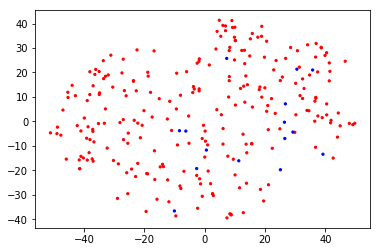

In [250]:
col = ['r','b']
idx = []
c = []
for i in range(movie_r.shape[0]):
    if df_item.iloc[i,15]==1:
        idx.append(i)
        c.append(col[0])
    elif df_item.iloc[i,19]==1:
        idx.append(i)
        c.append(col[1])

# Plot embedding
plt.scatter(movie_r[idx, 0], movie_r[idx, 1],c=c,s=5)

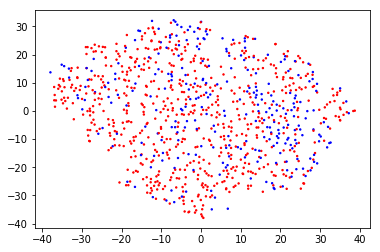

In [167]:
col = ['r','b']
idx = []
c = []
for i in range(user_r.shape[0]):
    if datauser.iloc[i,2]==1:
        idx.append(i)
        c.append(col[0])
    else:
        idx.append(i)
        c.append(col[1])

# Plot embedding
plt.scatter(user_r[idx, 0], user_r[idx, 1],c=c,s=2)

In [ ]:
c = ['r','b']

In [113]:
plt.show()
color = np.zeros(1682,dtype=np.str)
s = np.zeros(1682)

for i in range(len(color)):
    color[i]=c[df_item.iloc[i,9]]
    if df_item.iloc[i,9] == 0:
        s[i]=1
    else:
        s[i]=1

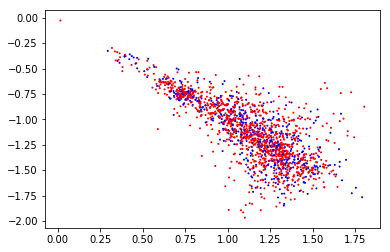

In [115]:
# Plot embedding
plt.scatter(movie_weights_class[:, 0], movie_weights_class[:, 1],c=c,s=s)

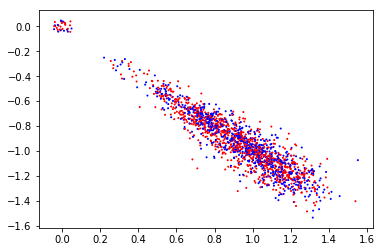

In [322]:
# Plot embedding
plt.scatter(book_weights_class[:, 1], book_weights_class[:, 2],c=color,s=s)

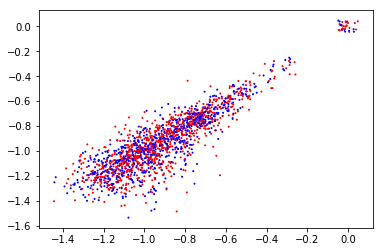

In [323]:
# Plot embedding
plt.scatter(book_weights_class[:, 0], book_weights_class[:, 2],c=color,s=s)

In [172]:
from IPython.core.interactiveshell import InteractiveShell

# Set shell to show all lines of output
InteractiveShell.ast_node_interactivity = 'all'

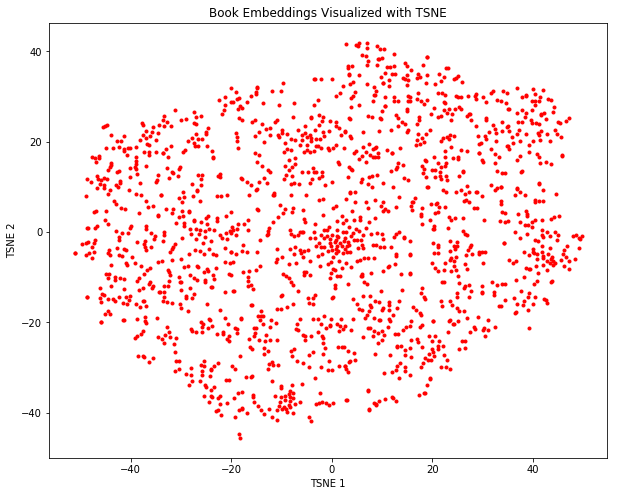

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = 'last'

plt.figure(figsize = (10, 8))
plt.plot(movie_r[:, 0], movie_r[:, 1], 'r.')
plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('Book Embeddings Visualized with TSNE');

In [189]:
df_item['genre'] = pd.Series(np.zeros(len(df_item.item_id)), index=df_item.index)

In [190]:
mat = df_item.iloc[:,1:-1]

In [191]:
mat.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,56
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,65542
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,65536
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,290
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,65856


In [192]:
mat =np.array(mat)
mat
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        if mat[i,j]==1:
            df_item.iloc[i,-1]+=2**j

In [193]:
from collections import Counter, OrderedDict

def count_items(l):
    """Return ordered dictionary of counts of objects in `l`"""
    
    # Create a counter object
    counts = Counter(l)
    
    # Sort by highest count first and place in ordered dictionary
    counts = sorted(counts.items(), key = lambda x: x[1], reverse = True)
    counts = OrderedDict(counts)
    
    return counts
genre_counts = count_items(df_item.genre)

In [213]:
# Include 10 most popular genres
genre_to_include = list(genre_counts.keys())[:2]

In [214]:
genre_to_include

[256.0, 32.0]

In [215]:
genres=[]

In [216]:
idx_include=[]

In [217]:
for i in range(len(df_item)):
    if df_item[i:i+1]['genre'].item() in genre_to_include:
        idx_include.append(np.int(df_item[i:i+1].item_id)-1)
        genres.append(df_item[i:i+1].genre.item())
len(idx_include)

589

In [218]:
ints, gen = pd.factorize(genres)
max(ints)

1

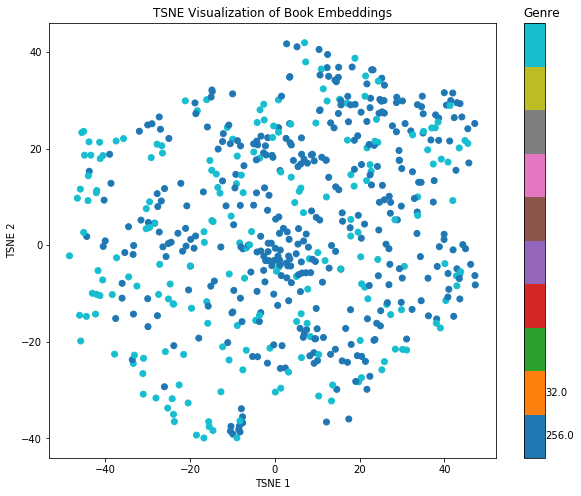

In [219]:
plt.figure(figsize = (10, 8))

# Plot embedding
plt.scatter(movie_r[idx_include, 0], movie_r[idx_include, 1], 
            c = ints, cmap = plt.cm.tab10)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])
for j, lab in enumerate(gen):
    cbar.ax.text(1, (2 * j + 1) / ((10) * 2), lab, ha='left', va='center')
cbar.ax.set_title('Genre', loc = 'left')


plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('TSNE Visualization of Book Embeddings');